<a href="https://colab.research.google.com/github/Saifullah-17/task01_creditescore/blob/main/character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset to see the first few rows and understand its structure
file_path = '/content/TMNIST_Data.csv'
data = pd.read_csv(file_path)
# Display basic information about the dataset and the first few rows
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29900 entries, 0 to 29899
Columns: 786 entries, names to 784
dtypes: int64(785), object(1)
memory usage: 179.3+ MB


(None,
                         names  labels  1  2  3  4  5  6  7  8  ...  775  776  \
 0          GrandHotel-Regular       2  0  0  0  0  0  0  0  0  ...    0    0   
 1  EncodeSansCondensed-Medium       8  0  0  0  0  0  0  0  0  ...    0    0   
 2              Varela-Regular       4  0  0  0  0  0  0  0  0  ...    0    0   
 3              ArefRuqaa-Bold       3  0  0  0  0  0  0  0  0  ...    0    0   
 4           KulimPark-Regular       1  0  0  0  0  0  0  0  0  ...    0    0   
 
    777  778  779  780  781  782  783  784  
 0    0    0    0    0    0    0    0    0  
 1    0    0    0    0    0    0    0    0  
 2    0    0    0    0    0    0    0    0  
 3    0    0    0    0    0    0    0    0  
 4    0    0    0    0    0    0    0    0  
 
 [5 rows x 786 columns])

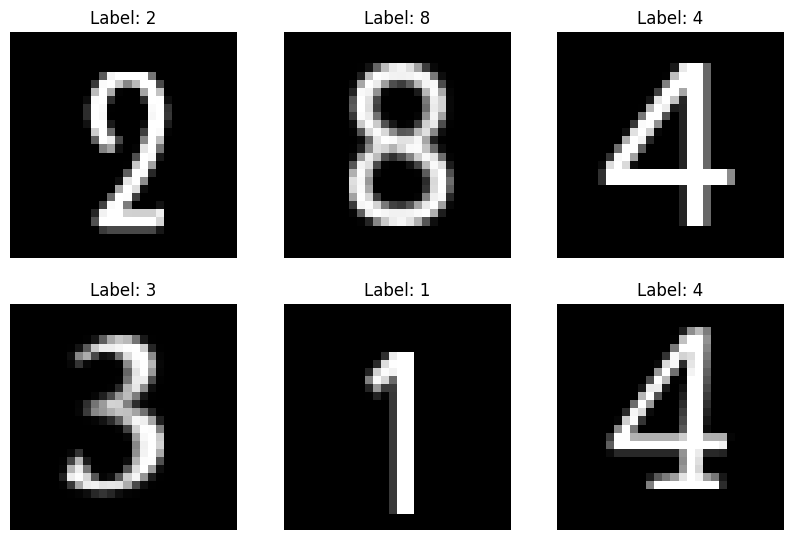

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the pixel data is numeric
pixel_data = data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Display the first few images
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    image = pixel_data.iloc[i].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {data.iloc[i, 1]}')
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Normalize the pixel values and split the dataset into training and testing sets
X = data.iloc[:, 2:].values / 255.0  # normalize pixel values
y = data['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8592 - loss: 0.5054 - val_accuracy: 0.9787 - val_loss: 0.0819
Epoch 2/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.9838 - loss: 0.0535 - val_accuracy: 0.9762 - val_loss: 0.0752
Epoch 3/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9888 - loss: 0.0371 - val_accuracy: 0.9854 - val_loss: 0.0536
Epoch 4/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.9849 - val_loss: 0.0642
Epoch 5/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9930 - loss: 0.0208 - val_accuracy: 0.9870 - val_loss: 0.0588
Epoch 6/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9940 - loss: 0.0183 - val_accuracy: 0.9879 - val_loss: 0.0556
Epoch 7/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.9879 - val_loss: 0.0515
Epoch 8/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.9975 - loss: 0.0081 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

187/187 - 2s - 10ms/step - accuracy: 0.9935 - loss: 0.0374
Test accuracy: 99.35%


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 0.9862 - val_loss: 0.0754
Epoch 2/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9879 - val_loss: 0.0705
Epoch 3/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9879 - val_loss: 0.0703
Epoch 4/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9866 - val_loss: 0.0712
Epoch 5/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9891 - val_loss: 0.0651
Epoch 6/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.9883 - val_loss: 0.0609
Epoch 7/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.9875 - val_loss: 0.0742
Epoch 8/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9989 - loss: 0.0032 - 

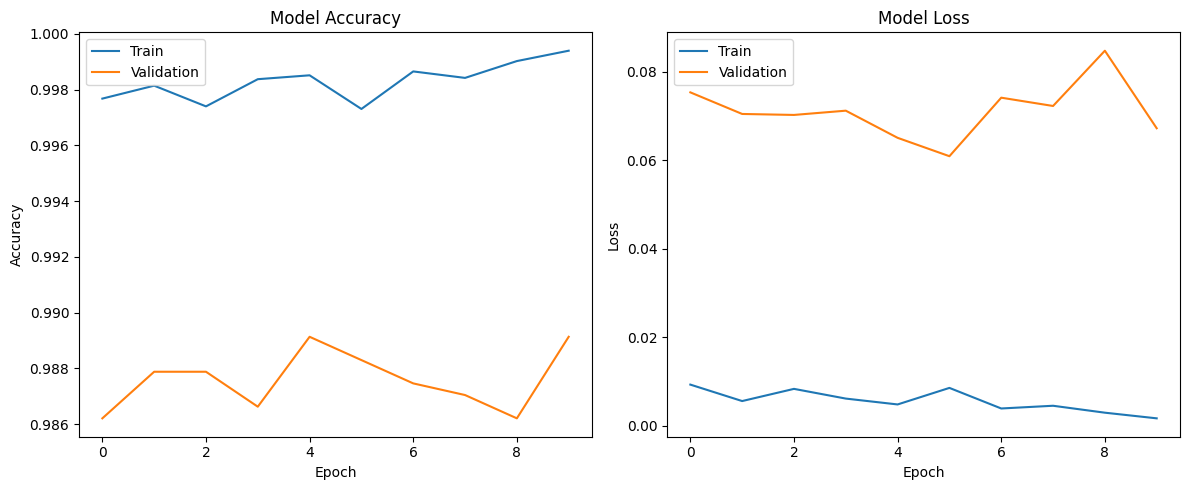

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()